In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Downloading the data

In [2]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare

url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figsharerainfall/"

In [3]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [4]:
%%time
files_to_dl = ["data.zip"] 
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: total: 12.6 s
Wall time: 14min 38s


In [5]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: total: 20.2 s
Wall time: 26.5 s


In [6]:
os.chdir("figsharerainfall")

In [7]:
# remove observed_daily_rainfall.csv file 
exclude_file = 'observed_daily_rainfall_SYD.csv'
os.remove(exclude_file)

# Combining data CSVs

In [8]:
%%time
## using a normal python way for merging the data 
import pandas as pd

# files = glob.glob('figsharerainfall/*.csv')
extension = 'csv'
all_filenames = glob.glob('*.{}'.format(extension))

df = pd.concat((pd.read_csv(file, index_col=0)
                # .assign(model=re.findall(r'(?<=\/)[^_]+(?=_)', file))
                .assign(model=re.findall(r'^[^_]+(?=_)', file)[0])
                for file in all_filenames)
              )

df.to_csv("combined_data.csv")

CPU times: total: 6min 34s
Wall time: 6min 49s


* We have combined data csv from data.zip to a single csv.
* The time taken to combine the csv varied between 6min to 32min 52s when ran across 2 Windows and 2 Mac systems. 
* Mac OS M1 was able to work on combining the datafile into a single CSV slightly faster than Windows. One of our teammates used Mac 8GB i5 processor and the processor performed extremely slow in comparison to 16GB Windows i5 Processor and 8GB  M1 Mac system.So, maybe the more powerful the processor is , the faster it performs and the performance also depends on RAM. 
* The time taken on each group members' laptops is shown below:

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Affrin Sultana    |   Windows 10 Education               | 16GB    |    AMD Ryzen 9 5000Series       |   Yes     |     6m39s       |
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz   1.80 GHz |  Yes     | 8m1s |
| Manju Abhinandana Kumar    |    MacBook Air (M1, 2020)              |   8 GB  |  Apple M1         |   Yes     |      6min 22s      |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         32min 52s   |

# Simple EDA

In [9]:
df.tail()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
2014-12-27 12:00:00,-30.157068,-29.21466,153.125,154.375,0.554375,TaiESM1
2014-12-28 12:00:00,-30.157068,-29.21466,153.125,154.375,7.028577,TaiESM1
2014-12-29 12:00:00,-30.157068,-29.21466,153.125,154.375,0.234757,TaiESM1
2014-12-30 12:00:00,-30.157068,-29.21466,153.125,154.375,2.097459,TaiESM1
2014-12-31 12:00:00,-30.157068,-29.21466,153.125,154.375,0.548421,TaiESM1


In [10]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2
1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2


In [11]:
# Checking the dtype of each column
df.info()
print(f"Memory usage with float64: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   model          object 
dtypes: float64(5), object(1)
memory usage: 3.3+ GB
Memory usage with float64: 3498.20 MB


# Changing the dtype

In [12]:
# Changing the dtype of numerical columns from float64 to float32 
column_name = list(df.select_dtypes(include=['float64']))
for name in column_name:
    df[name] = df[name].astype('float32')

In [13]:
df.info()
print(f"Memory usage with float32: {df.memory_usage().sum() / 1e6:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float32
 1   lat_max        float32
 2   lon_min        float32
 3   lon_max        float32
 4   rain (mm/day)  float32
 5   model          object 
dtypes: float32(5), object(1)
memory usage: 2.1+ GB
Memory usage with float32: 2248.84 MB


* Originally the numerical columns had float 64 as the data type , which consumed 3.3+GB of memory.On changing the datatype to float32, the memory has been significantly reduced to 2.1+GB

# Load the combined CSV to memory
## Load all columns

In [14]:
%%time
df1 = pd.read_csv("combined_data.csv")
print(df1["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 1min 20s
Wall time: 1min 21s


In [15]:
df1.shape

(62467843, 7)

## Loading it in Chunks

In [16]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("combined_data.csv", chunksize=10_000_000):
    counts = counts.add(chunk["model"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
AWI-ESM-1-1-LR       966420
BCC-CSM2-MR         3035340
BCC-ESM1             551880
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
CanESM5              551880
EC-Earth3-Veg-LR    3037320
FGOALS-f3-L         3219300
FGOALS-g3           1287720
GFDL-CM4            3219300
GFDL-ESM4           3219300
INM-CM4-8           1609650
INM-CM5-0           1609650
KIOST-ESM           1287720
MIROC6              2070900
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-HR       5154240
MPI-ESM1-2-LR        966420
MRI-ESM2-0          3037320
NESM3                966420
NorESM2-LM           919800
NorESM2-MM          3541230
SAM0-UNICON         3541153
TaiESM1             3541230
dtype: int32
CPU times: total: 1min 8s
Wall time: 1min 9s


In [17]:
%%time
print(df1['rain (mm/day)'].min())

-3.807372927370557e-12
CPU times: total: 312 ms
Wall time: 318 ms


In [18]:
%%time
df1.describe()

CPU times: total: 12.4 s
Wall time: 12.6 s


,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,5.924854e+07,6.246784e+07,5.924854e+07,6.246784e+07,5.924854e+07
mean,-3.310482e+01,-3.197757e+01,1.469059e+02,1.482150e+02,1.901170e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.585735e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.838413e-06
50%,-3.300000e+01,-3.204188e+01,1.468750e+02,1.481250e+02,6.154947e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.020918e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


In [19]:
%%time
df1.isnull().sum()

CPU times: total: 12.7 s
Wall time: 12.7 s


time                   0
lat_min          3219300
lat_max                0
lon_min          3219300
lon_max                0
rain (mm/day)    3219300
model                  0
dtype: int64

## Loading only those columns that are needed

In [20]:
%%time
use_cols = ['rain (mm/day)', 'model']
df3 = pd.read_csv("combined_data.csv", usecols = use_cols)

print(df3["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 45.7 s
Wall time: 45.8 s


In [21]:
%%time
df3.groupby('model').mean()

CPU times: total: 3.84 s
Wall time: 3.86 s


,rain (mm/day)
model,
ACCESS-CM2,1.787025
ACCESS-ESM1-5,2.217501
AWI-ESM-1-1-LR,2.026071
BCC-CSM2-MR,1.951832
BCC-ESM1,1.811032
CMCC-CM2-HR4,2.279350
CMCC-CM2-SR5,2.383389
CMCC-ESM2,2.266125
CanESM5,1.894328


* The time taken to load all the columns acroos the systems was on an average 1m 20s although Yair's machine took a lot of time 13min 52s
* When loaded in chunks, we didnot see a massive reduction in time in our machines, it just improved by 10s although the time taken by Yair's system got reduced by 1/3rd.
* When we treid loading only those columns which we needed, we saw the significant improvement. Our systems hardly took 48s on an average to load the combined csv even Yair's system took comparatively lesser time than previous methods of loading.
* As discussed above, the huge time difference between our systems and Yair's system could be due to the processor and smaller RAM.
* On changing the data type from float64 to float32, although we didn't observe any impact on the time, the memory usage reduced nearly by half.

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(Load All columns) | Time taken(Load in chunks) |Time taken(Load red columns) |
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Education               | 16GB    |    AMD Ryzen 9 5000Series       |   Yes    |     1m29s      | 1m8s | 48s
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | 1m25s | 1m18s | 48.1s | 
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)            |  8 GB   |     Apple M1      |   Yes     |     1min 12s       |1min 8s | 46.8 s
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    |         13min 52s   | 4min 51s  |3min 1s |

# Perform a simple EDA in R

### 1. Transfer the dataframe from python to R

In [22]:
%load_ext rpy2.ipython

C:\Users\17783\miniconda3\envs\525_2022\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [23]:
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

In [24]:
%%R
suppressMessages(library(dplyr, warn.conflicts = FALSE))
suppressMessages(library(arrow, warn.conflicts = FALSE))
suppressMessages(library(ggplot2, warn.conflicts = FALSE))

**Feather**

In [25]:
%%time
df = pd.read_csv("combined_data.csv")
df.to_feather("combined_data.feather")

CPU times: total: 1min 34s
Wall time: 1min 38s


In [26]:
%%sh

# check the feather file size
du -sh combined_data.feather

1.2G	combined_data.feather


In [27]:
%%time
%%R

# Read feather file
df_feather <- open_dataset("combined_data.feather", format="feather")

CPU times: total: 156 ms
Wall time: 217 ms


In [28]:
%%time
%%R
print(df_feather %>% collect)

# A tibble: 62,467,843 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <chr>                 <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 12:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 12:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 12:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 12:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 12:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 12:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 12:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

**Parquet**

In [29]:
%%time
df.to_parquet("combined_data.parquet")

CPU times: total: 50.5 s
Wall time: 51.7 s


In [30]:
%%time
%%R
df_pq <- open_dataset("combined_data.parquet", format="parquet")

CPU times: total: 109 ms
Wall time: 211 ms


In [31]:
%%time
%%R
df_pq_final <- df_pq %>% collect
print(df_pq_final)

# A tibble: 62,467,843 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <chr>                 <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 12:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 12:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 12:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 12:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 12:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 12:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 12:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 12:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

**Arrow exchange**

In [32]:
%%time
dataset = ds.dataset("combined_data.csv", format="csv")
table = dataset.to_table()
r_table = pyra.converter.py2rpy(table)

CPU times: total: 1min 13s
Wall time: 1min 13s


In [33]:
%%time
%%R -i r_table
start_time <- Sys.time()
suppressMessages(library(dplyr))
df_ae <- r_table 
end_time <- Sys.time()
df_ae_final <- df_ae %>% collect()
print(df_ae %>% collect())
print(end_time - start_time)

# A tibble: 62,467,843 x 7
   time                lat_min lat_max lon_min lon_max `rain (mm/day)` model    
   <dttm>                <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>    
 1 1889-01-01 04:00:00   -36.2     -35    141.    142.        3.29e-13 ACCESS-C~
 2 1889-01-02 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 3 1889-01-03 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 4 1889-01-04 04:00:00   -36.2     -35    141.    142.        0        ACCESS-C~
 5 1889-01-05 04:00:00   -36.2     -35    141.    142.        1.05e- 2 ACCESS-C~
 6 1889-01-06 04:00:00   -36.2     -35    141.    142.        3.29e- 2 ACCESS-C~
 7 1889-01-07 04:00:00   -36.2     -35    141.    142.        8.91e- 2 ACCESS-C~
 8 1889-01-08 04:00:00   -36.2     -35    141.    142.        3.16e- 2 ACCESS-C~
 9 1889-01-09 04:00:00   -36.2     -35    141.    142.        3.11e- 2 ACCESS-C~
10 1889-01-10 04:00:00   -36.2     -35    141.    142.        3.30e- 2 ACCESS-C~
#

We explored `feather` format,   `parquet` format as well as `arrow exchange` format as hown above.
We chose `arrow exchange`as our choice due to following reasons:
* First of all, `Pandas exchange` technique costs a long time and consumes big memory. The kernel kept on dieing when we tried it on our laptops. In `arrow exchange` method, time spent on this serialization/deserialization process(arrow) is very less and is also a zero-copy process. 
* Secondly,  based on the similar running time, we prefer `arrow exchange` because it can help us save much redundant work and does not require to save data files. 
* Last but not the least, this method is very friendly to work with dplyr.

### 2. EDA in R: Mean Rain by all models and Distribution or rain fall by model

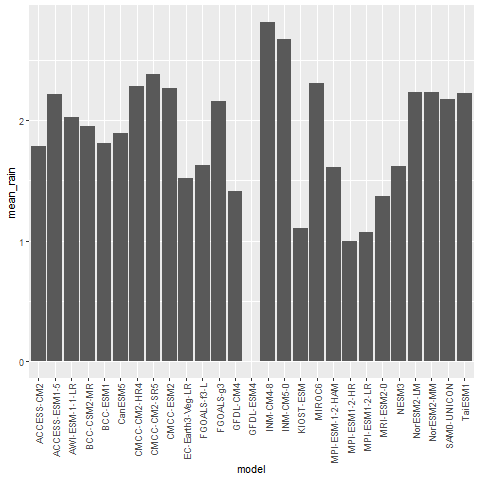

CPU times: total: 5.31 s
Wall time: 6.58 s


In [34]:
%%time
%%R
names(df_ae_final) <- make.names(names(df_ae_final), unique=TRUE)
df_ae_final %>%
    group_by(model) %>%
    summarise(mean_rain = mean(rain..mm.day.)) %>%
    ggplot((aes(x=model,y=mean_rain))) +
        geom_bar(stat='identity')+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))            

In [35]:
%%time
%%R
str(df_ae_final)

tibble [62,467,843 x 7] (S3: tbl_df/tbl/data.frame)
 $ time         : POSIXct[1:62467843], format: "1889-01-01 04:00:00" "1889-01-02 04:00:00" ...
 $ lat_min      : num [1:62467843] -36.2 -36.2 -36.2 -36.2 -36.2 ...
 $ lat_max      : num [1:62467843] -35 -35 -35 -35 -35 -35 -35 -35 -35 -35 ...
 $ lon_min      : num [1:62467843] 141 141 141 141 141 ...
 $ lon_max      : num [1:62467843] 142 142 142 142 142 ...
 $ rain..mm.day.: num [1:62467843] 3.29e-13 0.00 0.00 0.00 1.05e-02 ...
 $ model        : chr [1:62467843] "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" ...
CPU times: total: 109 ms
Wall time: 209 ms


* While performing EDA in R after converting the file to arrowm loading of chart took around 5s in Windows laptop , 2min 45s in Mac
* Other EDA operation took 93-150ms in Windows and 986ms in Mac

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken(load chart 1) | Time taken(str)|
|:-----------:|:----------------:|:---:|:---------:|:---:|:---:|:---:|
| Affrin Sultana    |   Windows 10 Education   | 16GB    |    AMD Ryzen 9 5000Series    |   Yes   |    5.89s     | 93.8ms|
| Helin Wang  | Windows 10 Education | 16GB | Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz 1.80 GHz  |  Yes   | 5.45s | 141ms |
| Manju Abhinandana Kumar    |      MacBook Air (M1, 2020)|  8 GB   |     Apple M1      |   Yes     |   Kernel crash for data loading |
| Yair Guterman    |    macOS Big Sur    |  8 GB   |    1.8 GHz Dual-Core Intel Core i5       |    Yes    | 2min 45s  |986 ms |

## Challenges and difficulties

* We kept on facing the following issue multiple times across all the sytems:
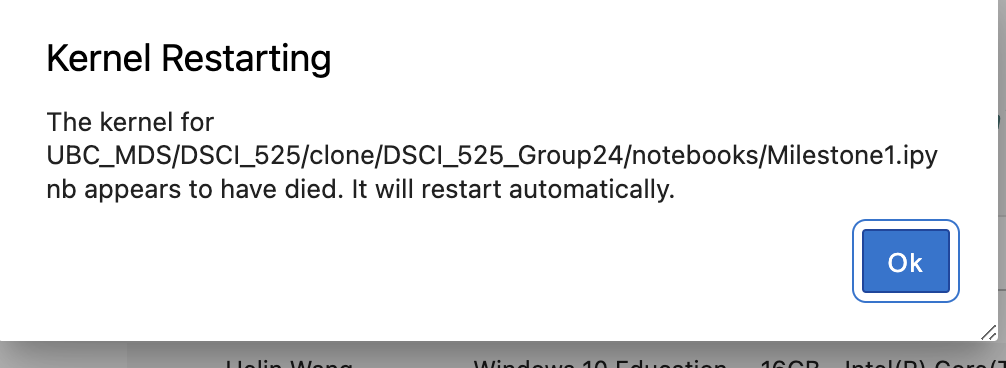
* We tried plotting few graphs without using parquet/arrow file , by simply loading the data, but we couldn't as the system couldn't handle it and we kept on running into memory issue. Hence we didnot attempt plotting without changing the file format.
* One of our team member Manju was not able to run the last EDA in arrow exchange file where we are loading the chart, as her system kept on crashing.
* It was a pain to run the overall notebook as it took a very long to complete and hampered other functionalities of the system(slowness, system hang, latency) while running.